In [ ]:
# Work with a dataset of book reviews, and build a model that can predict the rating of a review,
# ranging from 0-5.

In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
# import spacy
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from nltk.stem import WordNetLemmatizer

In [ ]:
df = pd.read_csv('train.csv' , on_bad_lines='skip')

# EDA

In [ ]:
# How does the data look like ?
df.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,rating
0,1c845473e18c23f917126cb29bc8d243,6547260,5805e560deacf886537b2e76b2653515,I finished this in two days. THIS SERIES IS JU...,Sat Nov 16 00:26:42 -0800 2013,Mon Jan 26 11:14:39 -0800 2015,Mon Jan 26 11:14:39 -0800 2015,Sat Jan 24 00:00:00 -0800 2015,0,0,5
1,0867fa7e18da1a292d0256fad0ee4e31,17201095,84c2e89581004bedd01dea2833bed181,Review to follow \n Goodreads 4 \n Amazon 5 \n...,Wed Jan 02 11:22:44 -0800 2013,Sun Apr 28 20:23:22 -0700 2013,NaN,NaN,0,0,5
2,a57237ef712461148672852d8f47e300,16143347,956d4ea003698d83c1495cc251be5bc0,I will have a full review up eventually but fo...,Thu Jun 19 15:48:04 -0700 2014,Thu May 05 09:09:58 -0700 2016,Thu Jun 19 00:00:00 -0700 2014,Thu Jun 19 00:00:00 -0700 2014,0,0,5
3,80589c77f4fa826eaaf7c5d71ff3b81e,7863423,e5ed7e0401cbe5c44e7b7ee4e1af4f09,4 stars. Aww! I loved this one! I have read th...,Wed Sep 16 18:52:06 -0700 2015,Sun Sep 20 18:34:34 -0700 2015,Sun Sep 20 00:00:00 -0700 2015,Sat Sep 19 00:00:00 -0700 2015,1,0,4
4,916977f433fbf96ae9de9669f8aec040,17262303,51b4449f83ff8c9d13a3b6aa2df4fb27,this is official: Patrick Ness is my fav author,Sun Oct 13 11:47:17 -0700 2013,Mon Sep 15 17:51:03 -0700 2014,Tue Sep 16 17:51:03 -0700 2014,NaN,0,0,5


In [ ]:
# How big is the data ?
df.shape

(630000, 11)

In [ ]:
# What is the data type of given columns ?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       630000 non-null  object
 1   book_id       630000 non-null  int64 
 2   review_id     630000 non-null  object
 3   review_text   630000 non-null  object
 4   date_added    630000 non-null  object
 5   date_updated  630000 non-null  object
 6   read_at       565775 non-null  object
 7   started_at    437963 non-null  object
 8   n_votes       630000 non-null  int64 
 9   n_comments    630000 non-null  int64 
 10  rating        630000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 52.9+ MB


In [ ]:
# According to the question considering only review & rating colums for further analysis.
df = df.iloc[:,[3,10]]

In [ ]:
df.head()

,review_text,rating
0,I finished this in two days. THIS SERIES IS JU...,5
1,Review to follow \n Goodreads 4 \n Amazon 5 \n...,5
2,I will have a full review up eventually but fo...,5
3,4 stars. Aww! I loved this one! I have read th...,4
4,this is official: Patrick Ness is my fav author,5


In [ ]:
# Number of characters in a review.
df['num_characters'] = df['review_text'].apply(len)
df.head()

,review_text,rating,num_characters
0,I finished this in two days. THIS SERIES IS JU...,5,90
1,Review to follow \n Goodreads 4 \n Amazon 5 \n...,5,55
2,I will have a full review up eventually but fo...,5,1874
3,4 stars. Aww! I loved this one! I have read th...,4,858
4,this is official: Patrick Ness is my fav author,5,47


In [ ]:
# Number of words in a review.
df['num_words']=df['review_text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,review_text,rating,num_characters,num_words
0,I finished this in two days. THIS SERIES IS JU...,5,90,23
1,Review to follow \n Goodreads 4 \n Amazon 5 \n...,5,55,9
2,I will have a full review up eventually but fo...,5,1874,410
3,4 stars. Aww! I loved this one! I have read th...,4,858,193
4,this is official: Patrick Ness is my fav author,5,47,10


In [ ]:
# Number of sentences in a review.
df['num_sentences'] = df['review_text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,review_text,rating,num_characters,num_words,num_sentences
0,I finished this in two days. THIS SERIES IS JU...,5,90,23,4
1,Review to follow \n Goodreads 4 \n Amazon 5 \n...,5,55,9,1
2,I will have a full review up eventually but fo...,5,1874,410,26
3,4 stars. Aww! I loved this one! I have read th...,4,858,193,15
4,this is official: Patrick Ness is my fav author,5,47,10,1


In [ ]:
df.describe() # To get the idea of lenth of reviews i.e. maximum, minimum length of review.

,rating,num_characters,num_words,num_sentences
count,630000.000000,630000.000000,630000.000000,630000.000000
mean,3.689635,1064.061694,224.469729,12.282456
std,1.252588,1251.305052,262.428895,14.035273
min,0.000000,2.000000,1.000000,1.000000
25%,3.000000,219.000000,47.000000,3.000000
50%,4.000000,604.000000,128.000000,7.000000
75%,5.000000,1462.000000,308.000000,16.000000
max,5.000000,19826.000000,4019.000000,150.000000


# Data preprocessing
- Lower case
- Tokenization
- Removing Special Characters
- Removing Stop Words and Punctuation
- Stemming / Lemmentization

In [ ]:
# Data preprocessing contains all steps written above. But for this perticualr dataset
# countvectorizer & tfidfvectorizer will not work because dataset is huge (In my several trails i found
# that converting sparse metrix to a dence np.array was memory demanding and because of high
# dimensionality it will be computaionally heavy task.), So I opted for Word2Vec method.
# Benifits of Word2Vec - 1. Semantic meaning of words 2. Low dimensions 3. Dense Vector
# Again in my several trails i found that Word2Vec was working relatively better without stemming or Lemmentization.

In [2]:
def transform_text(text):
    text = text.lower() # Lowercasing:Convert all text to lowercase to ensure consistency.
    text = nltk.word_tokenize(text) # Tokenization:Tokenize the text into individual words or phrases.

    y = []
    for i in text :
        if i.isalpha(): # Keeping only alphabetical words.
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # Removing Stopwords.
            y.append(i)
    return " ".join(y)

In [ ]:
# Review_text transformation with the help of above written function. (# ~ 2 hours to complete this.)
df['transformed_review'] = df['review_text'].apply(transform_text)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   review_text         630000 non-null  object
 1   rating              630000 non-null  int64 
 2   num_characters      630000 non-null  int64 
 3   num_words           630000 non-null  int64 
 4   num_sentences       630000 non-null  int64 
 5   transformed_review  630000 non-null  object
dtypes: int64(4), object(2)
memory usage: 28.8+ MB


In [ ]:
# Saving the dataset with transformed_review if in case jupyiter kernel crashes.(precaution)
df.to_csv('nonlemm_alpha#.csv')

In [31]:
# Reading the saved data set
df = pd.read_csv('nonlemm_alpha#.csv')

In [32]:
df.shape

(630000, 7)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          630000 non-null  int64 
 1   review_text         630000 non-null  object
 2   rating              630000 non-null  int64 
 3   num_characters      630000 non-null  int64 
 4   num_words           630000 non-null  int64 
 5   num_sentences       630000 non-null  int64 
 6   transformed_review  629699 non-null  object
dtypes: int64(5), object(2)
memory usage: 33.6+ MB


In [34]:
# Null value check
df.isnull().sum()

Unnamed: 0              0
review_text             0
rating                  0
num_characters          0
num_words               0
num_sentences           0
transformed_review    301
dtype: int64

In [35]:
# Removed null values.
df.dropna(inplace = True)

In [36]:
df.shape

(629699, 7)

In [37]:
corpus = []
for msg in df['transformed_review'].tolist():
    for word in msg.split():
        corpus.append(word)

In [38]:
# Overall total words in dataset.
len(corpus)

57607399

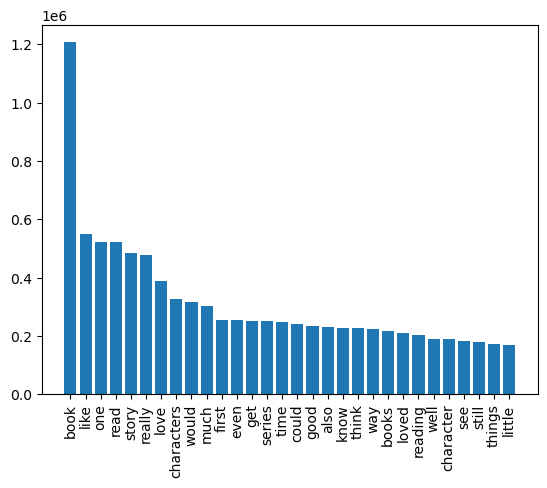

In [ ]:
# Most common words
plt.bar(pd.DataFrame(Counter(corpus).most_common(30))[0],pd.DataFrame(Counter(corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [39]:
# Required Libraries for Word2Vec
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [40]:
story = []
for doc in df['transformed_review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [41]:
len(story)

629699

In [42]:
# Model for Word2vec
model = gensim.models.Word2Vec(
    window = 10,
    min_count = 2
)

In [43]:
model.build_vocab(story)

In [44]:
# Word2vec model training
model.train(story, total_examples = model.corpus_count, epochs = model.epochs)

(267814805, 287730205)

In [45]:
# total number of words in word2vec vocabulary
len(model.wv.index_to_key)

125721

In [46]:
import pickle
pickle.dump(model,open('word2vec_model.pkl','wb'))

In [47]:
# Average word2vec (function for - one vector for one review)
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis = 0)

In [48]:
# Finally convering text data into vectors.
from tqdm import tqdm
X = [] # This list will contain all vectors.
count = 0
for doc in tqdm(df['transformed_review'].values):
    try:                           # Exception handeling, to handel some wierd reviews i.e. hashtags, one word reviews
        count = count + 1
        X.append(document_vector(doc))
    except:            # Adding Randomly generated vector for some troublesome reviews.
        X.append(np.random.uniform(-1,1,(100,)))

100%|██████████| 629699/629699 [1:04:57<00:00, 161.55it/s]


In [49]:
# Converting list into np.array
X = np.array(X)

In [50]:
# Cross check - shape of arary and dataset.
X.shape, df.shape

((629699, 100), (629699, 7))

In [51]:
# Saving dataset & X in case if kernel crashes again.
df.to_csv('splitThis.csv')
import pickle
pickle.dump(X,open('X.pkl','wb'))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
import pandas as pd
import pickle
import numpy as np

In [53]:
df = pd.read_csv('splitThis.csv')

In [54]:
df.shape # 629660 ->629699

(629699, 8)

In [55]:
df.head()

,Unnamed: 0.1,Unnamed: 0,review_text,rating,num_characters,num_words,num_sentences,transformed_review
0,0,0,I finished this in two days. THIS SERIES IS JU...,5,90,23,4,finished two days series good stop fuck ending
1,1,1,Review to follow \n Goodreads 4 \n Amazon 5 \n...,5,55,9,1,review follow goodreads amazon overall
2,2,2,I will have a full review up eventually but fo...,5,1874,410,26,full review eventually initial hopefully thoug...
3,3,3,4 stars. Aww! I loved this one! I have read th...,4,858,193,15,stars aww loved one read series order even tho...
4,4,4,this is official: Patrick Ness is my fav author,5,47,10,1,official patrick ness fav author


In [56]:
X = pickle.load(open('X.pkl','rb'))

In [57]:
y = df['rating'].values
y.shape

(629699,)

# Model Building

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((503759, 100), (503759,), (125940, 100), (125940,))

In [ ]:
# ! pip install xgboost

In [59]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB # MultinomialNB - can't use because X contains -ve values
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [60]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))

0.25859139272669524
[[ 1762   461  1006   262   422   410]
 [  569   681  2414   156   117    89]
 [ 1041   562  6863  1069   503   196]
 [ 2975   551 13990  5158  3176   753]
 [ 5629   636 16518  7275  9947  3589]
 [ 5537   662 10952  2968  8885  8156]]


In [61]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred_bnb =bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))

0.3794981737335239
[[ 1721   409   351   582   448   812]
 [  508  1181  1143   634   252   308]
 [  795  1219  2917  3456  1161   686]
 [ 2314  1140  3751 11368  5491  2539]
 [ 4590  1192  2578 12848 12671  9715]
 [ 4325   806  1129  4817  8147 17936]]


In [62]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))

0.4871367317770367
[[  750   243   402   656  1187  1085]
 [  127   524  1136  1121   761   357]
 [  115   221  1655  4653  3008   582]
 [  151   137   926  9232 14308  1849]
 [  253    97   360  5213 28466  9205]
 [  229    97   134  1061 14916 20723]]


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

0.47366038814598355
[[  641    95   169   706  1538  1169]
 [  101   311   580  1264  1136   521]
 [   75   155   872  4427  3878   795]
 [   63    57   439  8442 14734  2430]
 [   62    23   145  5300 28052 10440]
 [   68    11    38  1273 14591 21331]]


In [63]:
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='saga', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [64]:
clfs = {
    'KN' : knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [65]:
knc.fit(X_train, y_train) # 2m30sec
y_pred_knc = knc.predict(X_test)
print(accuracy_score(y_test,y_pred_knc))

0.4256074321105288


In [66]:
dtc.fit(X_train, y_train) # 40 sec 
y_pred_dtc = dtc.predict(X_test)
print(accuracy_score(y_test,y_pred_dtc))

0.42459107511513416


In [ ]:
lrc.fit(X_train, y_train) # 1min30sec
y_pred_lrc = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred_lrc))

0.48955785662103357


In [ ]:
rfc.fit(X_train, y_train) # 5min30sec
y_pred_rfc = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred_rfc))

0.4627656195407045


In [ ]:
abc.fit(X_train, y_train) # 6min30sec
y_pred_abc = abc.predict(X_test)
print(accuracy_score(y_test,y_pred_abc))

0.4575643998348315


In [ ]:
bc.fit(X_train, y_train) # 52min
y_pred_bc = bc.predict(X_test)
print(accuracy_score(y_test,y_pred_bc))

0.46396467935076074


In [ ]:
etc.fit(X_train, y_train) #2min
y_pred_etc = etc.predict(X_test)
print(accuracy_score(y_test,y_pred_etc))

0.45800908426770004


In [ ]:
gbdt.fit(X_train, y_train)
y_pred_gbdt = gbdt.predict(X_test)
print(accuracy_score(y_test,y_pred_gbdt))

0.4717943016866245


In [ ]:
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print(accuracy_score(y_test,y_pred_xgb)) # Best so far

0.4950290633040053


In [9]:
# Hyper Parameter Optimization of XGBoostClassifier.
params = {
"learning_rate"     : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
"max_depth"         : [3, 4, 5, 6, 8, 10, 12, 15],
"min_child_weight"  : [1, 3, 5, 7],
"gamma"             : [0.0, 0.1, 0.2, 0.3, 0.4],
"colsample_bytree"  : [0.3, 0.4, 0.5, 0.7]
}

In [10]:
from sklearn.model_selection import RandomizedSearchCV

In [11]:
xgb1 = XGBClassifier()

In [12]:
random_search = RandomizedSearchCV(xgb1, param_distributions=params, n_iter=5, scoring='accuracy', cv=5, verbose=3)

In [13]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.484 total time= 1.9min
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.485 total time= 2.0min
[CV 3/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.486 total time= 1.8min
[CV 4/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.486 total time= 1.9min
[CV 5/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=1;, score=0.486 total time= 1.9min
[CV 1/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.483 total time=17.8min
[CV 2/5] END colsample_bytree=0.7, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=1;, score=0.478 total time=17.0min
[CV 3/5] END colsample_byt

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='accuracy', verbose=3)

In [14]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [67]:
xgb2 = XGBClassifier(min_child_weight = 7, max_depth = 10, learning_rate = 0.3, gamma = 0.3, colsample_bytree = 0.5)

In [68]:
xgb2.fit(X_test, y_test)
y_pred_xgb2 = xgb2.predict(X_test)
print(accuracy_score(y_test,y_pred_xgb2)) # Fantastic. We will use this model.

0.991702397967286


In [69]:
import pickle
pickle.dump(xgb2,open('xgb2.pkl','wb'))

# Final Prediction on "TEST DATA"

In [70]:
test = pd.read_csv('test.csv')

In [71]:
test.head()

,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,de3a6a28c83cda006b415d45d64674c9,1618,d76ce5becf493e5c653610edb806ffc4,"I'm going to keep this review short, because I...",Tue Jun 09 10:37:48 -0700 2015,Wed Jun 10 13:43:38 -0700 2015,Wed Jun 10 14:08:39 -0700 2015,Tue Jun 09 00:00:00 -0700 2015,8,0
1,d9cfab35a87e32084b1817dfb0e98748,15776309,9c5c9aed79255a1a610dfc153ee90ad6,"You know, I was really stoked to see this come...",Mon Apr 22 09:19:40 -0700 2013,Wed Jul 10 14:34:27 -0700 2013,Wed Jul 10 14:34:27 -0700 2013,Tue Jul 09 00:00:00 -0700 2013,0,0
2,24935a870a46525a37be92775ab18f76,478927,ad26332459cda8f40581fef7a29b800c,This is one of those books where you know you ...,Sat Mar 14 12:16:55 -0700 2015,Sun Apr 05 11:25:00 -0700 2015,Wed Mar 18 00:00:00 -0700 2015,Sat Mar 14 00:00:00 -0700 2015,14,0
3,6ccb40eabdd0db7895aac00963256469,22628,5bb75768be7f2ddcd632336778b67f5a,The perks of being a wallflower \n What does a...,Sat Sep 12 08:43:30 -0700 2015,Sat Sep 12 09:19:29 -0700 2015,NaN,NaN,0,0
4,9f9d0f6e9a6a5797a252ef81abc9421c,13596809,3d7f76ea566b9ce0700772236094d936,"So, I wrote a review for this when I read it b...",Sun Jul 14 19:36:13 -0700 2013,Thu Jun 02 16:45:45 -0700 2016,Sat Mar 23 00:00:00 -0700 2013,NaN,0,0


In [4]:
def transform_text(text):
    text = text.lower() # Lowercasing:Convert all text to lowercase to ensure consistency.
    text = nltk.word_tokenize(text) # Tokenization:Tokenize the text into individual words or phrases.

    y = []
    for i in text :
        if i.isalpha(): # Keeping only alphabetical words.
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation: # Removing Stopwords.
            y.append(i)
    return " ".join(y)

In [5]:
test['transformed_review'] = test['review_text'].apply(transform_text)

In [6]:
test.to_csv('tetsTran.csv')

In [72]:
test = pd.read_csv('tetsTran.csv')

In [73]:
word2vec_model = pickle.load(open('word2vec_model.pkl','rb'))

In [74]:
# Average word2vec (function for - one vector for one review)
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in word2vec_model.wv.index_to_key]
    return np.mean(word2vec_model.wv[doc], axis = 0)

In [75]:
# Finally convering text data into vectors.
from tqdm import tqdm
T = [] # This list will contain all vectors.
for doc in tqdm(test['transformed_review'].values):
    try:                           # Exception handeling, to handel some wierd reviews i.e. hashtags, one word reviews
        T.append(document_vector(doc))
    except :                       # Adding Randomly generated vector for some troublesome reviews.
        T.append(np.random.uniform(-1,1,(100,)))

100%|██████████| 270000/270000 [37:07<00:00, 121.19it/s] 


In [76]:
T = np.array(T)

In [77]:
T.shape

(270000, 100)

In [78]:
import pickle
pickle.dump(T, open('T.pkl', 'wb'))

In [80]:
xgb2 = pickle.load(open('xgb2.pkl', 'rb'))

In [81]:
# Prediction for test reviews.
Test_Predictions = xgb2.predict(T) 

In [83]:
Test_Predictions.shape

(270000,)

In [85]:
test['Predicted_Ratings'] = Test_Predictions

In [86]:
test.head()

,Unnamed: 0,user_id,book_id,review_id,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,transformed_review,Predicted_Ratings
0,0,de3a6a28c83cda006b415d45d64674c9,1618,d76ce5becf493e5c653610edb806ffc4,"I'm going to keep this review short, because I...",Tue Jun 09 10:37:48 -0700 2015,Wed Jun 10 13:43:38 -0700 2015,Wed Jun 10 14:08:39 -0700 2015,Tue Jun 09 00:00:00 -0700 2015,8,0,going keep review short feel like dangerous to...,4
1,1,d9cfab35a87e32084b1817dfb0e98748,15776309,9c5c9aed79255a1a610dfc153ee90ad6,"You know, I was really stoked to see this come...",Mon Apr 22 09:19:40 -0700 2013,Wed Jul 10 14:34:27 -0700 2013,Wed Jul 10 14:34:27 -0700 2013,Tue Jul 09 00:00:00 -0700 2013,0,0,know really stoked see come library website re...,4
2,2,24935a870a46525a37be92775ab18f76,478927,ad26332459cda8f40581fef7a29b800c,This is one of those books where you know you ...,Sat Mar 14 12:16:55 -0700 2015,Sun Apr 05 11:25:00 -0700 2015,Wed Mar 18 00:00:00 -0700 2015,Sat Mar 14 00:00:00 -0700 2015,14,0,one books know want reading years ago dreams c...,5
3,3,6ccb40eabdd0db7895aac00963256469,22628,5bb75768be7f2ddcd632336778b67f5a,The perks of being a wallflower \n What does a...,Sat Sep 12 08:43:30 -0700 2015,Sat Sep 12 09:19:29 -0700 2015,NaN,NaN,0,0,perks wallflower wallflower mean question edgi...,4
4,4,9f9d0f6e9a6a5797a252ef81abc9421c,13596809,3d7f76ea566b9ce0700772236094d936,"So, I wrote a review for this when I read it b...",Sun Jul 14 19:36:13 -0700 2013,Thu Jun 02 16:45:45 -0700 2016,Sat Mar 23 00:00:00 -0700 2013,NaN,0,0,wrote review read accidentally deleted whole b...,4
